In [1]:
pip install pandas==1.3.1

In [2]:
pip install pyLDAvis

In [1]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import nltk
from nltk.corpus import stopwords
import gensim
from gensim import corpora

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jikim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
print('샘플의 수 :',len(documents))

샘플의 수 : 11314


In [4]:
documents[1]

"\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little leap of faith, Jimmy.  Your logic runs out\nof steam!\n\n\n\n\n\n\n\nJim,\n\nSorry I can't pity you, Jim.  And I'm sorry that you have these feelings of\ndenial about the faith you need to get by.  Oh well, just pretend that it will\nall end happily ever after anyway.  Maybe if you start a new newsgroup,\nalt.atheist.hard, you won't be bummin' so much?\n\n\n\n\n\n\nBye-Bye, Big Jim.  Don't forget your Flintstone's Chewables!  :) \n--\nBake Timmons, III"

In [5]:
print(dataset.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [6]:
news_df = pd.DataFrame({'document':documents})
# 특수 문자 제거
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")
# 길이가 3이하인 단어는 제거 (길이가 짧은 단어 제거)
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# 전체 단어에 대한 소문자 변환
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

<ipython-input-6-b4124dfb5e6a>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")


In [7]:
news_df['clean_doc'][1]

'yeah expect people read actually accept hard atheism need little leap faith jimmy your logic runs steam sorry pity sorry that have these feelings denial about faith need well just pretend that will happily ever after anyway maybe start newsgroup atheist hard bummin much forget your flintstone chewables bake timmons'

In [8]:
# NLTK로부터 불용어를 받아온다.
stop_words = stopwords.words('english')
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split()) # 토큰화
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

In [11]:
tokenized_doc[:5]

0    [well, sure, story, seem, biased, disagree, st...
1    [yeah, expect, people, read, actually, accept,...
2    [although, realize, principle, strongest, poin...
3    [notwithstanding, legitimate, fuss, proposal, ...
4    [well, change, scoring, playoff, pool, unfortu...
Name: clean_doc, dtype: object

In [12]:
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]

# 수행된 결과에서 1번 인덱스 뉴스 출력
print(corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 4), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 2), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1)]


In [13]:
print(dictionary[66])

faith


In [14]:
len(dictionary)

64281

In [15]:
NUM_TOPICS = 20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)

topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.028*"space" + 0.010*"nasa" + 0.009*"data" + 0.007*"center"')
(1, '0.014*"would" + 0.011*"people" + 0.009*"think" + 0.008*"know"')
(2, '0.020*"government" + 0.012*"encryption" + 0.010*"would" + 0.009*"clipper"')
(3, '0.018*"thanks" + 0.017*"drive" + 0.014*"please" + 0.014*"know"')
(4, '0.017*"tobacco" + 0.009*"germany" + 0.008*"rockefeller" + 0.008*"sweden"')
(5, '0.016*"neutral" + 0.007*"navy" + 0.005*"reality" + 0.005*"accelerators"')
(6, '0.024*"entry" + 0.022*"output" + 0.021*"file" + 0.011*"period"')
(7, '0.011*"good" + 0.009*"engine" + 0.007*"ground" + 0.007*"condition"')
(8, '0.017*"judges" + 0.013*"mask" + 0.010*"expose" + 0.009*"financial"')
(9, '0.011*"bike" + 0.009*"road" + 0.009*"food" + 0.008*"picture"')
(10, '0.022*"insurance" + 0.014*"cheers" + 0.012*"kent" + 0.011*"weaver"')
(11, '0.021*"game" + 0.019*"team" + 0.016*"year" + 0.014*"games"')
(12, '0.015*"file" + 0.011*"program" + 0.011*"files" + 0.010*"window"')
(13, '0.010*"time" + 0.010*"would" + 0.008*"much" + 0

In [16]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

C:\Users\jikim\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [17]:
for i, topic_list in enumerate(ldamodel[corpus]):
  if i==5:
    break
  print(i,'번째 문서의 topic 비율은',topic_list)

0 번째 문서의 topic 비율은 [(1, 0.48944056), (14, 0.087039776), (16, 0.22974612), (17, 0.18085387)]
1 번째 문서의 topic 비율은 [(1, 0.81441224), (6, 0.029264072), (15, 0.13392314)]
2 번째 문서의 topic 비율은 [(1, 0.5485586), (2, 0.18716069), (16, 0.25054833)]
3 번째 문서의 topic 비율은 [(1, 0.16438212), (2, 0.40726787), (7, 0.2631331), (13, 0.15248808)]
4 번째 문서의 topic 비율은 [(1, 0.28467032), (6, 0.44094384), (11, 0.24289577)]


In [18]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%), 
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

In [19]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:10]

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,1.0,0.4895,"[(1, 0.48945102), (14, 0.086959705), (16, 0.22..."
1,1,1.0,0.8144,"[(1, 0.81441224), (6, 0.029264094), (15, 0.133..."
2,2,1.0,0.5485,"[(1, 0.54851717), (2, 0.1871808), (16, 0.25056..."
3,3,2.0,0.4073,"[(1, 0.16433318), (2, 0.40727198), (7, 0.26313..."
4,4,6.0,0.4409,"[(1, 0.2845633), (6, 0.44090605), (11, 0.24304..."
5,5,1.0,0.7114,"[(1, 0.7113672), (14, 0.107625425), (16, 0.067..."
6,6,3.0,0.3490,"[(0, 0.057890814), (1, 0.13923523), (3, 0.3489..."
7,7,1.0,0.6929,"[(1, 0.6928603), (5, 0.089577496), (15, 0.0643..."
8,8,1.0,0.3421,"[(1, 0.3421217), (8, 0.06017344), (9, 0.135040..."
9,9,13.0,0.3957,"[(1, 0.13444771), (2, 0.03715483), (3, 0.08970..."


Dictionary<28 unique tokens: ['나는', '라면을', '먹는다.', '아침에', '자주']...>
corpus : [[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)], [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)], [(7, 1), (8, 1), (9, 1), (10, 1), (11, 1)], [(12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)], [(2, 1), (15, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1)]]
(0, '0.075*"먹는다." + 0.060*"자주" + 0.060*"나는" + 0.057*"라면을" + 0.054*"아침에" + 0.054*"스마트폰을" + 0.036*"밥" + 0.034*"회화" + 0.034*"혼자" + 0.034*"점심시간에"')
(1, '0.050*"스마트폰은" + 0.050*"필수품이" + 0.050*"먹는다." + 0.050*"되었다." + 0.049*"삶에서" + 0.048*"현대인의" + 0.040*"스마트폰을" + 0.040*"아침에" + 0.036*"라면을" + 0.033*"나는"')


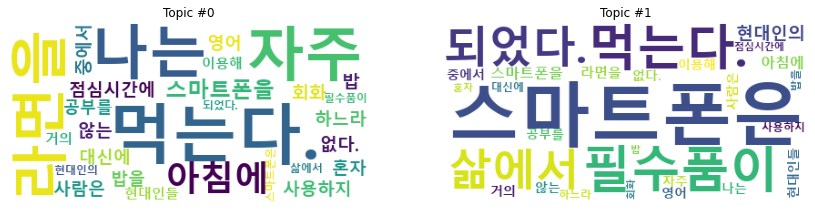

In [4]:
from gensim import corpora 
from gensim import models
from wordcloud import WordCloud
import matplotlib.pyplot as plt

documents=[
    '나는 아침에 라면을 자주 먹는다.',
    '나는 아침에 밥 대신에 라면을 자주 먹는다.',
    '현대인의 삶에서 스마트폰은 필수품이 되었다.',
    '현대인들 중에서 스마트폰을 사용하지 않는 사람은 거의 없다. ',
    '점심시간에 스마트폰을 이용해 영어 회화 공부를 하느라 혼자 밥을 먹는다.'
]

stoplist = ('.!?')                                        # 불용어 처리
texts = [[word for word in document.split() if word not in stoplist]
        for document in documents]

dictionary = corpora.Dictionary(texts)                    # 사전 생성 (토큰화)
print(dictionary)

corpus = [dictionary.doc2bow(text) for text in texts]     # 말뭉치 생성 (벡터화)
print('corpus : {}'.format(corpus))

#-----------------------------------------------------------------

lda = models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, 
        num_topics=2, random_state = 1)                   # 모델구축

for t in lda.show_topics():  # 주제마다 출현 확률이 높은 단어 순으로 출력
    print(t)

#-----------------------------------------------------------------

wc = WordCloud(background_color='white',
        font_path='C:/windows/Fonts/malgunbd.ttf')            # 워드클라우드

plt.figure(figsize=(30,30))
for t in range(lda.num_topics):
    plt.subplot(5,4,t+1)
    x = dict(lda.show_topic(t,200))
    im = wc.generate_from_frequencies(x)
    plt.imshow(im)
    plt.axis("off")
    plt.title("Topic #" + str(t))

plt.savefig('LDA_wordcloud.png', bbox_inches='tight')     # 이미지 저장